# Sentiment 140 Data Set
Will used pre-tagged data set containing about 1.6 million tweets tagged for negative, positive, and neutral sentiment. Try training and running a Naiive Bayes model from sklearn.

https://www.kaggle.com/datasets/kazanova/sentiment140?resource=download

In [26]:
import os
import pandas as pd
from comment_scraper import get_sql_table
from matplotlib import pyplot as plt
plt.style.use('seaborn-notebook')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag

from nltk.tokenize import TweetTokenizer

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
DATA_DIR = 'C:\\Users\\keatu\\Regis_archive\\practicum2_data\\'
dbname = os.path.join(DATA_DIR, "Youtube_Data_msnbc.db")

In [12]:
colnames = ["target","id","date","flag","user","text"]
s140_test = pd.read_csv(os.path.join(DATA_DIR,"resources","s140_test.csv"), names = colnames)
s140_train = pd.read_csv(os.path.join(DATA_DIR,"resources","s140_train.csv"), names = colnames, encoding='latin-1')

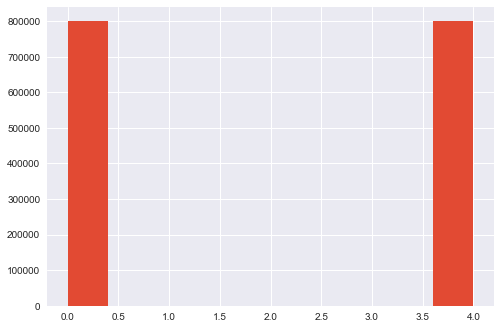

In [29]:
# lookt at distribution
s140_train['target'].hist()
plt.show()

In [4]:
def clean_data(text):
    stopwords = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    tokenizer = TweetTokenizer()
    reconstructed_list = []
    for each_text in text:
        lemmatized_tokens = []
        tokens=tokenizer.tokenize(each_text.lower())
        pos_tags=pos_tag(tokens)
        for each_token, tag in pos_tags: 
            if tag.startswith('NN'): 
                pos='n'
            elif tag.startswith('VB'): 
                pos='v'
            else: 
                pos='a'
            lemmatized_token=lemmatizer.lemmatize(each_token, pos)
            lemmatized_tokens.append(lemmatized_token)
        reconstructed_list.append(' '.join(lemmatized_tokens))
    return reconstructed_list

In [5]:
estimators=[('cleaner', FunctionTransformer(clean_data)), 
            ('vectorizer', TfidfVectorizer(max_features=100000, ngram_range=(1, 2)))]
preprocessing_pipeline=Pipeline(estimators)

In [33]:
s140_train.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [32]:
X=s140_train['text']
y=s140_train['target']
X_train, X_test, y_train, y_test=train_test_split(X, y)

# Fit and transform the pipeline
X_train_transformed=preprocessing_pipeline.fit_transform(X_train)

c:\Users\keatu\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


ValueError: could not convert string to float: '@MylissaDD *hugs* Sorry you had a bad day '